In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

# Load dataset
df = pd.read_csv("Global YouTube Statistics.csv", encoding="iso-8859-1")
print(df.head())

# Filter dataset to include only relevant columns
columns_to_keep = ['video views', 'uploads', 'category', 'created_year', 'subscribers']
df = df[columns_to_keep]

print(df.head())

   rank                    Youtuber  subscribers   video views  \
0     1                    T-Series    245000000  2.280000e+11   
1     2              YouTube Movies    170000000  0.000000e+00   
2     3                     MrBeast    166000000  2.836884e+10   
3     4  Cocomelon - Nursery Rhymes    162000000  1.640000e+11   
4     5                   SET India    159000000  1.480000e+11   

           category                       Title  uploads        Country  \
0             Music                    T-Series    20082          India   
1  Film & Animation               youtubemovies        1  United States   
2     Entertainment                     MrBeast      741  United States   
3         Education  Cocomelon - Nursery Rhymes      966  United States   
4             Shows                   SET India   116536          India   

  Abbreviation   channel_type  ...  subscribers_for_last_30_days  \
0           IN          Music  ...                     2000000.0   
1           US  

In [3]:
# Summary statistics
summary_stats = df.describe().transpose()
summary_stats.to_csv('summary_statistics.csv')  # Save for use in LaTeX or other formats

In [4]:
# Get the null value counts
null_counts = df.isnull().sum()

# Convert to DataFrame
null_counts_df = null_counts.to_frame(name='Null Count')

# Save to CSV
null_counts_df.to_csv('null_counts.csv', index=True)

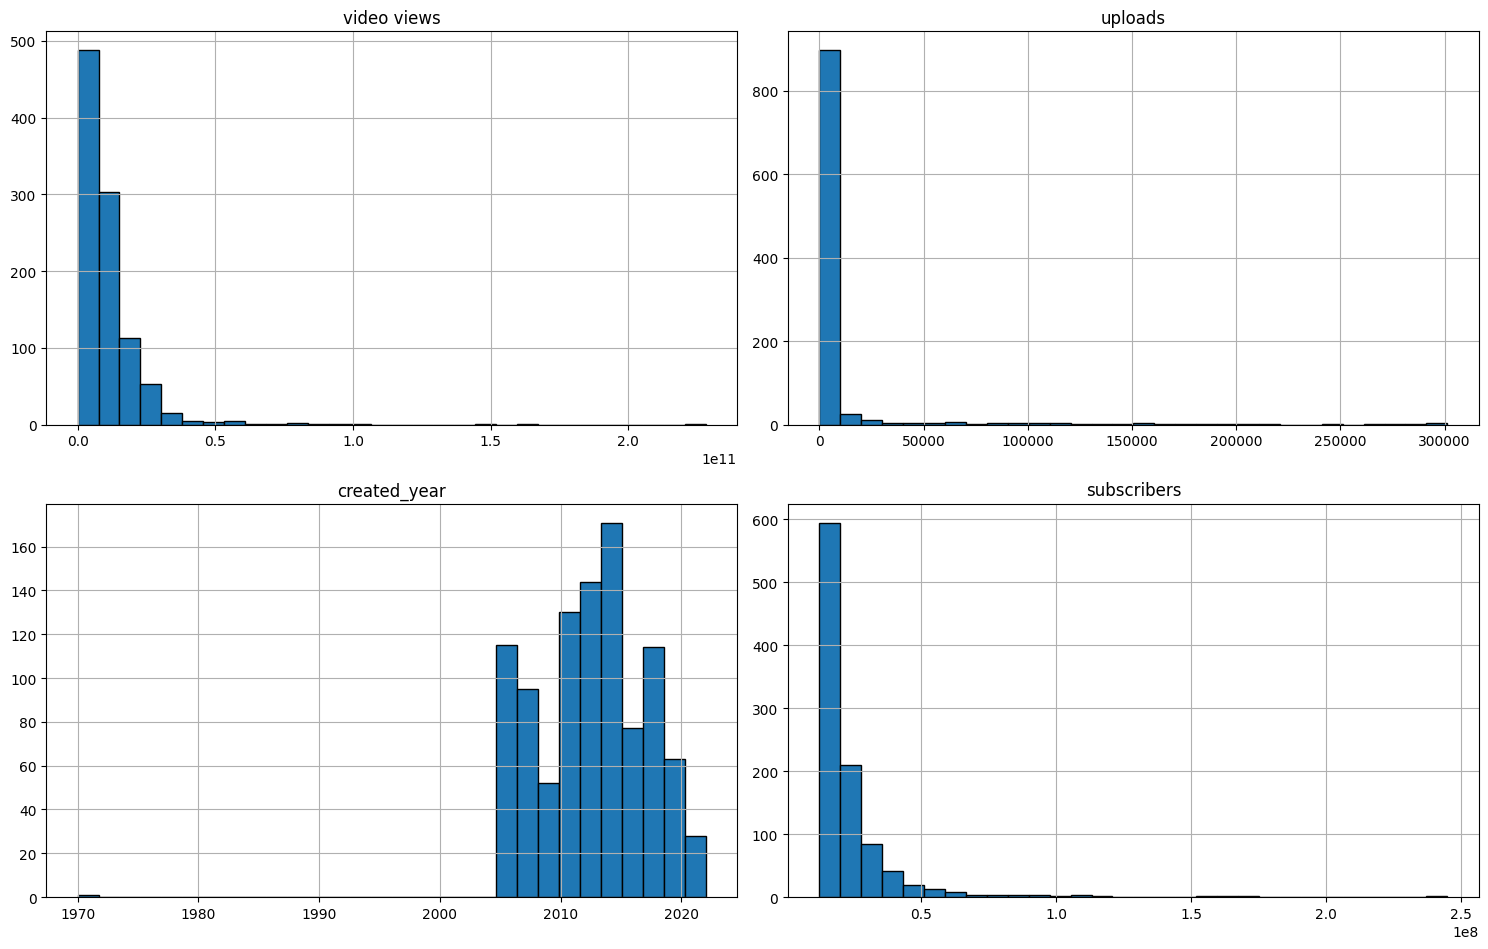

In [5]:
# Select all numerical columns except the excluded one
numerical_columns = df.select_dtypes(include=['number'])

# Plot histograms for the remaining numerical columns
numerical_columns.hist(bins=30, figsize=(15, 10), edgecolor='black')
plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.savefig('histograms.png')
plt.show()



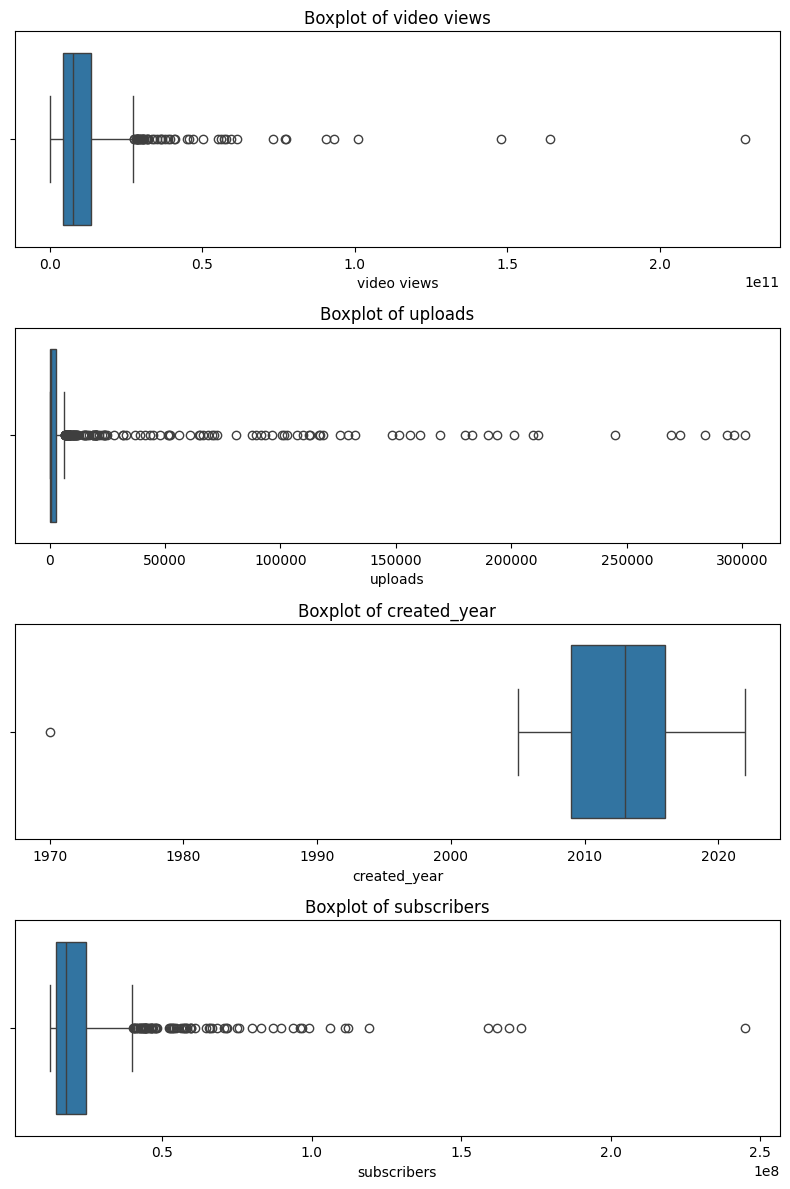

In [6]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Create boxplots for all numerical columns
numerical_columns = df.select_dtypes(include=['int64', 'float64']).columns

plt.figure(figsize=(8, len(numerical_columns) * 3))  # Adjust height based on the number of columns
for i, column in enumerate(numerical_columns, 1):
    plt.subplot(len(numerical_columns), 1, i)  # Create a subplot for each column
    sns.boxplot(x=df[column])
    plt.title(f'Boxplot of {column}')
    plt.tight_layout()

plt.savefig('boxplots_all_columns.png')
plt.show()

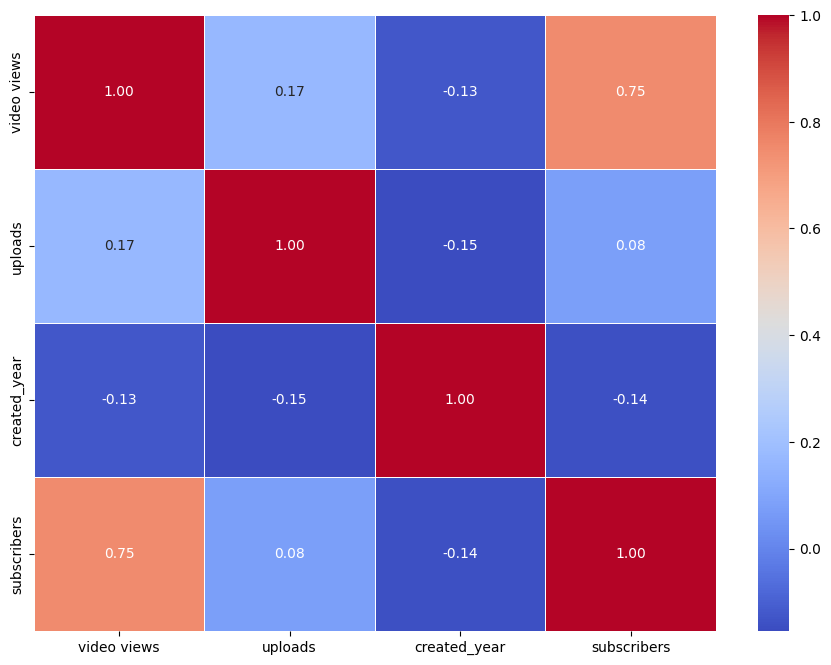

In [7]:
# Select only numeric columns
numeric_df = df.select_dtypes(include=['float64', 'int64'])

# Compute the correlation matrix
correlation_matrix = numeric_df.corr()

# Plot the heatmap
plt.figure(figsize=(11, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.savefig('correlation_heatmap.png')
plt.show()


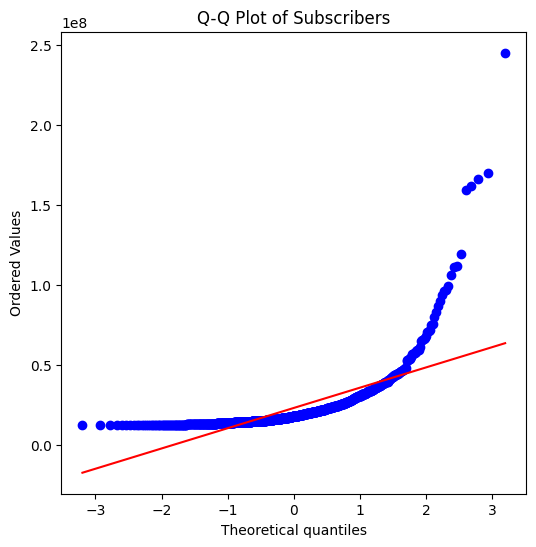

In [8]:
import scipy.stats as stats

# Generate Q-Q plot for a specific column
plt.figure(figsize=(6, 6))
stats.probplot(df['subscribers'], dist="norm", plot=plt)  # Replace 'subscribers' with a column of your choice
plt.title('Q-Q Plot of Subscribers')
plt.savefig('qq_plot.png')
plt.show()
